# Iris Dataset


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mitchell-Mirano/sorix/blob/main/docs/examples/nn/3-Iris_dataset.ipynb)
[![Open in GitHub](https://img.shields.io/badge/Open%20in-GitHub-black?logo=github)](https://github.com/Mitchell-Mirano/sorix/blob/main/docs/examples/nn/3-Iris_dataset.ipynb)
[![Open in Docs](https://img.shields.io/badge/Open%20in-Docs-blue?logo=readthedocs)](http://127.0.0.1:8000/examples/nn/3-Iris_dataset)

In [1]:
# Uncomment the following line to install GPU version with Cupy backend
#!pip install 'sorix @ git+https://github.com/Mitchell-Mirano/sorix.git@main'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Union

import sorix
from sorix.model_selection import train_test_split
from sorix.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sorix.nn import Module
from sorix import tensor,Tensor
from sorix.nn import CrossEntropyLoss
from sorix.metrics import accuracy_score
from sorix.optim import RMSprop
from sorix.nn import Linear,ReLU
from sorix.metrics import confusion_matrix, classification_report
import seaborn as sns

In [3]:
device = 'cuda' if sorix.cuda.is_available() else "cpu"
device

✅ GPU basic operation passed
✅ GPU available: NVIDIA GeForce RTX 4070 Laptop GPU
CUDA runtime version: 13000
CuPy version: 14.0.1


'cuda'

In [4]:
df  = pd.read_csv("../data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
labels = df["Species"].unique()

labels2id = {label: i for i, label in enumerate(labels)}
id2labels = {i: label for i, label in enumerate(labels)}

In [6]:
df['labels'] = df['Species'].map(labels2id)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [7]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
labels = ["labels"]

X_train = df_train[features]
y_train = df_train[labels]

X_test = df_test[features]
y_test = df_test[labels]

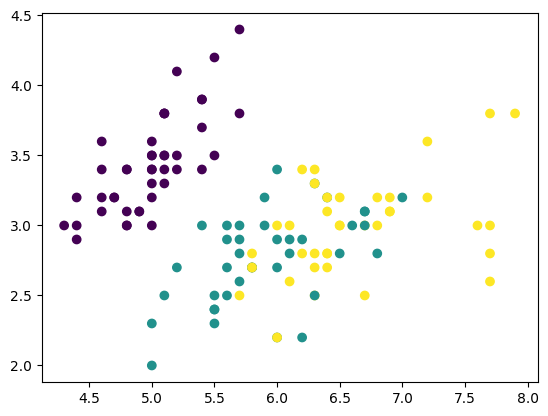

In [9]:
plt.scatter(X_train['SepalLengthCm'], X_train['SepalWidthCm'], c=y_train['labels'])

In [10]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

((120, 4), (120, 1), (30, 4), (30, 1))

In [12]:

X_train_tensor = tensor(X_train_scaled).to(device)
Y_train_tensor = tensor(y_train).to(device)

X_test_tensor = tensor(X_test_scaled).to(device)
Y_test_tensor = tensor(y_test).to(device)

print(f"X_train shape: {X_train_tensor.shape}, device: {X_train_tensor.device}")
print(f"Y_train shape: {Y_train_tensor.shape}, device: {Y_train_tensor.device}")
print(f"X_test shape: {X_test_tensor.shape}, device: {X_test_tensor.device}")
print(f"Y_test shape: {Y_test_tensor.shape}, device: {Y_test_tensor.device}")

X_train shape: (120, 4), device: cuda
Y_train shape: (120, 1), device: cuda
X_test shape: (30, 4), device: cuda
Y_test shape: (30, 1), device: cuda


In [13]:
class Net(Module):

    def __init__(self):
        super().__init__()
        self.fc1 = Linear(4, 8)
        self.fc2 = Linear(8, 4)
        self.fc3 = Linear(4, 3)
        self.relu = ReLU()

    def forward(self, x: tensor) -> Tensor:
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x
    

net = Net().to(device)
criterion = CrossEntropyLoss()
optimizer = RMSprop(net.parameters(), lr=1e-2)


In [14]:
logits = net(X_train_tensor)
logits

Tensor(
[[ 3.18380770e-02  5.91685631e-02 -7.86396504e-03]
 [ 3.13370197e+00  5.74086691e+00 -7.45613334e-01]
 [-6.27524252e-02 -1.36923843e+00  1.58636662e+00]
 [ 3.68812375e-03 -3.08446122e-01  4.18230142e-01]
 [-2.65776979e-02 -2.79022078e-01  2.54321886e-01]
 [ 2.34201072e+00  4.24755254e+00 -5.85250038e-01]
 [ 8.82216808e-03  2.42461865e-03  1.40565934e-02]
 [ 8.13916013e-02 -1.05761437e+00  1.66882102e+00]
 [-2.64715199e-02 -1.49514641e-01  9.24898444e-02]
 [-5.54242181e-04 -1.86377704e-02 -4.84749159e-02]
 [ 3.60032830e-02 -8.28358602e-01  1.21232245e+00]
 [ 2.06400820e+00  3.68548434e+00 -5.50437986e-01]
 [ 2.88001819e+00  5.23662302e+00 -7.55856685e-01]
 [ 2.21337046e+00  3.97225913e+00 -5.78986114e-01]
 [ 3.18288505e+00  5.80945838e+00 -6.86235603e-01]
 [ 1.45123381e-02 -5.24926676e-01  7.39887747e-01]
 [ 2.46062169e-02 -1.00287913e+00  1.40291056e+00]
 [-5.21423812e-02 -1.27879173e-01 -4.72920072e-02]
 [-5.65749397e-03 -3.95742734e-02  3.27227844e-02]
 [ 2.88399195e-02 -9.18

In [15]:
# Bucle de entrenamiento mejorado
for epoch in range(1000 + 1):
    logits = net(X_train_tensor)
    loss = criterion(logits, Y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        preds = sorix.argmax(logits, axis=1, keepdims=True)
        acc_train = (preds== Y_train_tensor).mean()
        with sorix.no_grad():
            logits = net(X_test_tensor)
            preds = sorix.argmax(logits, axis=1, keepdims=True)
            acc_test = (preds == Y_test_tensor).mean()

        # Usamos una f-string para formatear y alinear la salida
        print(f"[{device}] Epoch {epoch:5d} | Loss: {loss.item():.4f} | Acc Train: {acc_train.item()*100:.2f}% | Acc Test: {acc_test.item()*100:.2f}%")

        if acc_test.item() >= 0.96:  # Mejoramos el criterio de parada
            print(f"Entrenamiento completado en {epoch} epochs!")
            break


[cuda] Epoch     0 | Loss: 1.3640 | Acc Train: 34.17% | Acc Test: 50.00%


[cuda] Epoch    10 | Loss: 0.4880 | Acc Train: 85.83% | Acc Test: 93.33%
[cuda] Epoch    20 | Loss: 0.2957 | Acc Train: 90.83% | Acc Test: 93.33%
[cuda] Epoch    30 | Loss: 0.1825 | Acc Train: 94.17% | Acc Test: 100.00%
Entrenamiento completado en 30 epochs!


In [16]:
with sorix.no_grad():
    logits = net(X_test_tensor)
    preds = sorix.argmax(logits, axis=1, keepdims=True)

<Axes: >

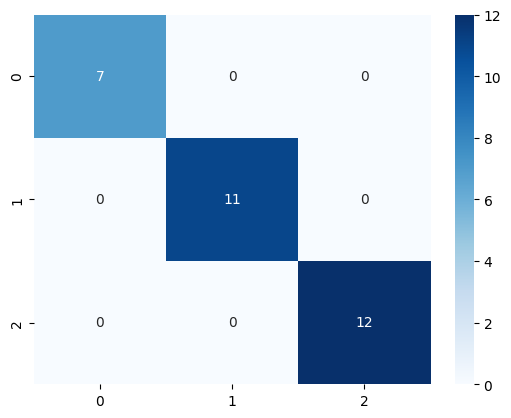

In [17]:
sns.heatmap(confusion_matrix(Y_test_tensor, preds), annot=True, cmap="Blues")

In [18]:
print(classification_report(Y_test_tensor, preds))

            precision   recall f1-score  support
0                1.00     1.00     1.00        7
1                1.00     1.00     1.00       11
2                1.00     1.00     1.00       12

accuracy                           1.00       30
macro avg        1.00     1.00     1.00       30
weighted avg     1.00     1.00     1.00       30
